In [69]:
import pandas as pd
from sklearn.cluster import KMeans, Birch, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import numpy as np

In [70]:
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\airline.csv')

In [71]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [72]:
df = df.drop(['Unnamed: 0', 'id', 'Flight Distance', 'Departure Delay in Minutes'], axis=1)
df['Gender'] = df['Gender'].replace(['Female', 'Male'], [0,1])
df['Type of Travel'] = df['Type of Travel'].replace(['Personal Travel', 'Business travel'], [0,1])
df['Class'] = df['Class'].replace(['Eco Plus', 'Business', 'Eco'], [0,1, 2])
df['Customer Type'] = df['Customer Type'].replace(['disloyal Customer', 'Loyal Customer'], [0,1])
df['satisfaction'] = df['satisfaction'].replace(['neutral or dissatisfied', 'satisfied'], [0,1])

def handle_null_median(df):
    # Need to set inplace=True, so it doesn't create a copy of the dataframe. Tried without and this led to null-values not being removed
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

    return  df

df = handle_null_median(df)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,0,3,4,3,1,5,...,5,5,4,3,4,4,5,5,18.0,0
1,1,0,25,1,1,3,2,3,3,1,...,1,1,1,5,3,1,4,1,6.0,0
2,0,1,26,1,1,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0.0,1
3,0,1,25,1,1,2,5,5,5,2,...,2,2,2,5,3,1,4,2,9.0,0
4,1,1,61,1,1,3,3,3,3,4,...,5,3,3,4,4,3,3,3,0.0,1


<AxesSubplot:>

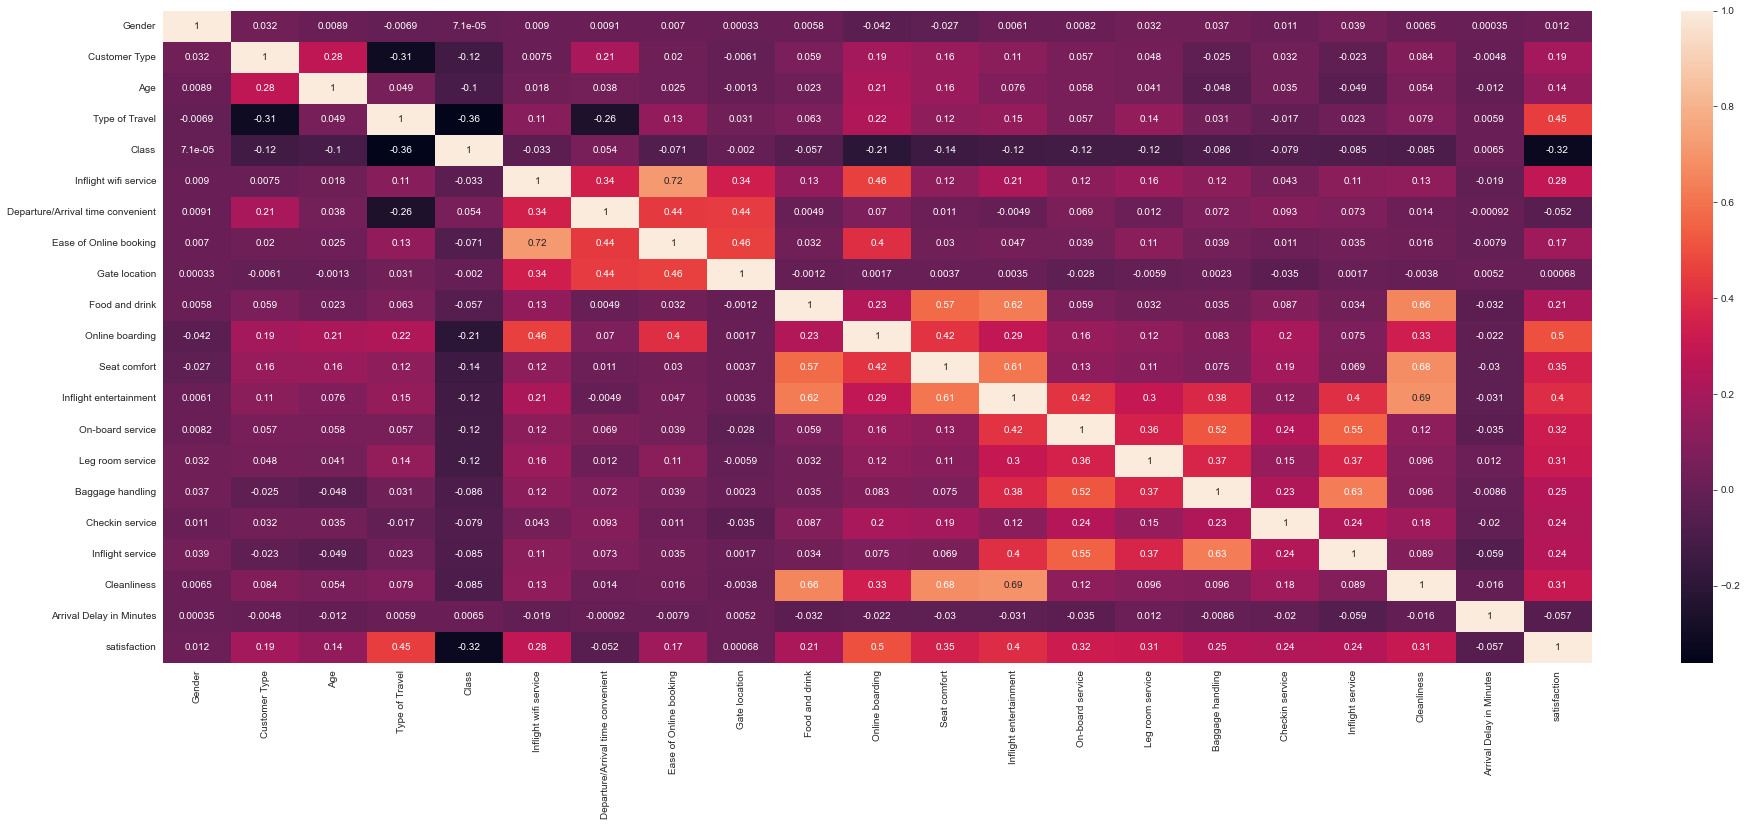

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(32, 12))
sns.heatmap(corr, annot=True)

In [74]:
df_unlabeled = df.drop(['satisfaction', 'Gate location', 'Departure/Arrival time convenient'], axis=1)
df_unlabeled.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes
0,1,1,13,0,0,3,3,5,3,5,5,4,3,4,4,5,5,18.0
1,1,0,25,1,1,3,3,1,3,1,1,1,5,3,1,4,1,6.0
2,0,1,26,1,1,2,2,5,5,5,5,4,3,4,4,4,5,0.0
3,0,1,25,1,1,2,5,2,2,2,2,2,5,3,1,4,2,9.0
4,1,1,61,1,1,3,3,4,5,5,3,3,4,4,3,3,3,0.0


In [75]:
train, test = train_test_split(df_unlabeled, train_size=0.90, random_state=42)

# Kmeans

In [76]:
kmeans = KMeans(n_clusters=2)
kmeans_cluster = kmeans.fit(train)

In [77]:
prediction = kmeans_cluster.predict(test)

In [78]:
silhouette_score(test, prediction)

0.7751028131389592

# BIRCH

In [79]:
drop_indices = np.random.choice(df_unlabeled.index, 90000, replace=False)
df_unlabeled = df_unlabeled.drop(drop_indices)
train, test = train_test_split(df_unlabeled, train_size=0.90, random_state=42)
df_unlabeled.shape

(13904, 18)

In [80]:
birch = Birch(n_clusters=2)
birch_cluster = birch.fit(train)

In [81]:
prediction = birch_cluster.predict(test)

In [82]:
silhouette_score(test, prediction)

0.7444138454582347

# Agglomerative

In [83]:
train, test = train_test_split(df_unlabeled, train_size=0.90, random_state=42)
df_unlabeled.shape

(13904, 18)

In [84]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=2)
agglomerative_cluster = agglomerative.fit(df_unlabeled)

In [85]:
silhouette_score(df_unlabeled, agglomerative.labels_)

0.8121910816448478